### 한빛아카데미 새로나온책 크롤링
* 10페이지(총 200권 정도)
* 한권한권 들어가서 tag 크롤링
* 제일 많이 나온 태그들 확인 -> 워드 크라우드

In [1]:
#한글 폰트 설치
!atp-get update -qq
!apt-get install -y fonts-nanum* -qq
#!fc-cache -fv > /dev/null
#!rm -rf ~/.cache/matplotlib > /dev/null

'atp-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
import requests
from bs4 import BeautifulSoup
import re  # 정규표현식
import pandas as pd
from tqdm.notebook import tqdm

from wordcloud import WordCloud, STOPWORDS
from PIL import Image  # 그림 불러오는 패키지
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


#NLTK Stopwords
from nltk.corpus import stopwords

In [3]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
base_url = "https://www.hanbit.co.kr/"

# 10page
p = [str(i+1) for i in range(11)]   

# 기존 양식용
line = []
# 워드크라우드용
line2 = []

for i in tqdm(range(len(p))):   # 페이지 loop
#for i in [0]:   # 페이지 loop

    # .. main 링크 페이지
    url_main = base_url + f"/academy/books/new_book_list.html?page={p[i]}&cate_cd=&srt=&searchKey=&keyWord="
    #print(url_main)
    html_main = requests.get(url_main, headers = headers).text
    soup_main = BeautifulSoup(html_main, 'html.parser')
    #print(soup_main)

    books = soup_main.select('div.sub_book_list_area > li')
    #print(books)
#
    for k in range(len(books)): # 페이지당 책리스트 loop
    #for k in [0]: # 페이지당 책리스트 loop

        # 서브링크 및 box 정보
        url_sub = base_url + books[k].select_one('p.book_tit > a')['href']
        #print(url_sub)

        html_sub = requests.get(url_sub, headers = headers).text
        soup_sub = BeautifulSoup(html_sub, 'html.parser')
        #print(soup_sub)

        bestList_sub = soup_sub.select('div.store_view_area')
        #print(bestList_sub)
        #print(len(bestList_sub))

        title = '---'
        tag = []

        for j in range(len(bestList_sub)):

            # 제목
            title = bestList_sub[j].select_one('h3').text
            print(title)

            # 태그
            tag_list = bestList_sub[j].select('div.tag_area > a')
            for li in tag_list:
                tag.append(li.text.strip())
                line2.append(li.text.strip())
        
            line.append( [title, tag] )
            

df = pd.DataFrame(line, columns=['제목', '태그'])
df

  0%|          | 0/11 [00:00<?, ?it/s]

처음 배우는 매트랩
SAS와 메타분석을 활용한 한번에 적용하는 의학보건통계
정보교과교육론(3판)
IT CookBook, 기초전자실험 with PSpice(3판)
경제수학 강의(3판)
글로벌 사회와 리더십(2판)
행동 재무론
IT CookBook, 알기 쉽게 해설한 파이썬 with 컴퓨팅 사고력
MATLAB으로 배우는 공학 수치해석(3판)
Cengel의 알기 쉬운 열역학(6판)
Cengel의 알기 쉬운 열전달(6판)
IT CookBook, 알기 쉽게 해설한 자바 프로그래밍(10판)
IT CookBook, 비즈니스 애널리틱스를 위한 데이터 마이닝
현대경영과학(9판)
IT CookBook, 네트워크 해킹과 보안(4판)
IT CookBook, 쉽게 배우는 운영체제(2판)
IT CookBook, Android Studio를 활용한 안드로이드 프로그래밍(8판)
STEM CookBook, 전기 및 하이브리드 자동차(3판)
IT CookBook, 컴퓨터 비전과 딥러닝
리더십 : 이론과 실제 (9판)
IT CookBook, JAVA 마스터
IT CookBook, 데이터 과학을 위한 파이썬 프로그래밍(2판)
IT CookBook, 생활 속 예제로 배우는 생생 데이터 분석
IT CookBook, 파워포인트 2019
메타버스로 구현하는 나만의 세상
국제경영학 : 환경과 운영 (17판)
머신러닝을 위한 수학
위상수학 첫걸음
IT CookBook, 전자기학 : ELECTROMAGNETICS (2판)
반도체 특강 : 소자편
IT CookBook, 처음 만나는 자동제어공학(2판)
누구나 R 데이터 분석
STEM CookBook, 정수론 첫걸음
IT CookBook, C# 프로그래밍 for Beginner
R과 jamovi를 활용한 한번에 적용하는 의학보건통계
글로벌 시장환경과 국제경영
미래 세상의 모빌리티
IT CookBook, 처음 만나는 전력공학(2판)
경영경제 통계학 4판 : Excel과 R의 실전적 활용
4차 산업혁명 시대의 국제마케팅(8판)
스마트 물류 비즈니스를 위한 글로벌 공

,제목,태그
0,처음 배우는 매트랩,"[매트랩, MATLAB, 매트랩 프로그래밍]"
1,SAS와 메타분석을 활용한 한번에 적용하는 의학보건통계,"[의학통계, 논문, 통계, 분석, 데이터분석, jamovi, 메타분석, 패널데이터,..."
2,정보교과교육론(3판),"[정보 교육, 교과교육론, 정보교과교육, SW교육, IT교육]"
3,"IT CookBook, 기초전자실험 with PSpice(3판)","[회로, 회로실험, 회로해석]"
4,경제수학 강의(3판),"[경제수학, 경영경제수학, 경영수학, 이계, 합성함수, 부정적분, 편미분, 정적분,..."
...,...,...
215,실무로 완성하는 PLC(멜섹Q) : 서보를 이용한 위치 제어,"[PLC, 서보제어, 위치제어, 서보모터제어, 서보, 모터제어, 멜섹, 멜섹Q, 생..."
216,"College Physics, 5th Edition","[CollegePhysics, Physics, 물리, 대학물리, 교양물리]"
217,Stata로 끝내는 논문,"[논문, 통계, Stata, 스타타]"
218,Business Statistics: For Contemporary Decision...,"[경영, 통계, 수학]"


In [4]:
line2

['매트랩',
 'MATLAB',
 '매트랩 프로그래밍',
 '의학통계',
 '논문',
 '통계',
 '분석',
 '데이터분석',
 'jamovi',
 '메타분석',
 '패널데이터',
 '의사',
 '의학',
 '보건',
 '정보 교육',
 '교과교육론',
 '정보교과교육',
 'SW교육',
 'IT교육',
 '회로',
 '회로실험',
 '회로해석',
 '경제수학',
 '경영경제수학',
 '경영수학',
 '이계',
 '합성함수',
 '부정적분',
 '편미분',
 '정적분',
 '역행렬',
 '리더십',
 '리더',
 '특성이론',
 '행동이론',
 '상황이론',
 '커뮤니케이션',
 '인간관계',
 '글로벌 리더',
 '행동 경제학',
 '행동 재무론',
 '금융',
 '투자',
 '재무',
 '주식',
 '연금',
 '넛지',
 '파이썬',
 'Python',
 '컴퓨팅 사고',
 '객체 지향 프로그래밍',
 '수치해석',
 'MATLAB',
 '공학수치해석',
 '보간법',
 '열역학',
 '에너지',
 'Thermodynamics',
 '열전달',
 '에너지',
 'Heat Transfer',
 '자바',
 'JAVA',
 '객체 지향 프로그래밍',
 'JDK',
 '데이터 마이닝',
 '애널리틱스',
 '머신러닝',
 '데이터 분석',
 '파이썬',
 '기계학습',
 '경영과학',
 '의사결정',
 '게임이론',
 '시스템분석',
 '보안',
 '해킹',
 '네트워크 보안',
 '암호',
 'DDOS',
 'DOS 해킹',
 'VPN',
 '방화벽',
 '운영체제',
 '컴퓨터 구조',
 '프로세스',
 '가상 메모리',
 '분산 시스템',
 '안드로이드 13',
 '안드로이드 프로그래밍',
 'Android Studio',
 '안드로이드 스튜디오',
 '자바',
 '전기자동차',
 '하이브리드 자동차',
 '친환경자동차',
 'EV',
 'HEV',
 'ICEV',
 '모터',
 '발전기',
 '배터리',
 '전기 기계',
 '컴퓨터 비전',
 '딥러

In [15]:
# .. line2 다 붙이기
text = ""
for i in line2:
    #text += i
    text = text + i + " "
print(text)

#wordCloud/STOPWORDS에서 제공하는 불용어(stopwords)
sw_wc = STOPWORDS

#워드 크라우드 생성
from wordcloud.wordcloud import FONT_PATH
fp = '../../한글글꼴/NanumGothic.ttf'
wc = WordCloud(background_color='white',
              max_words=2000, stopwords=sw_wc, font_path=fp)

wc = wc.generate(text)

# 단어 빈도수의 전체 비율 확인, 상위 10개까지
count = 0
for key, val in wc.words_.items():
    print(key, ':', val)
    count += 1
    if count > 10:        break



매트랩 MATLAB 매트랩 프로그래밍 의학통계 논문 통계 분석 데이터분석 jamovi 메타분석 패널데이터 의사 의학 보건 정보 교육 교과교육론 정보교과교육 SW교육 IT교육 회로 회로실험 회로해석 경제수학 경영경제수학 경영수학 이계 합성함수 부정적분 편미분 정적분 역행렬 리더십 리더 특성이론 행동이론 상황이론 커뮤니케이션 인간관계 글로벌 리더 행동 경제학 행동 재무론 금융 투자 재무 주식 연금 넛지 파이썬 Python 컴퓨팅 사고 객체 지향 프로그래밍 수치해석 MATLAB 공학수치해석 보간법 열역학 에너지 Thermodynamics 열전달 에너지 Heat Transfer 자바 JAVA 객체 지향 프로그래밍 JDK 데이터 마이닝 애널리틱스 머신러닝 데이터 분석 파이썬 기계학습 경영과학 의사결정 게임이론 시스템분석 보안 해킹 네트워크 보안 암호 DDOS DOS 해킹 VPN 방화벽 운영체제 컴퓨터 구조 프로세스 가상 메모리 분산 시스템 안드로이드 13 안드로이드 프로그래밍 Android Studio 안드로이드 스튜디오 자바 전기자동차 하이브리드 자동차 친환경자동차 EV HEV ICEV 모터 발전기 배터리 전기 기계 컴퓨터 비전 딥러닝 파이썬 OpenCV 텐서플로 경영 인사 조직 리더십 리더십 측정 자바 JAVA 객체 지향 프로그래밍 JDK 파이썬 프로그래밍 데이터 과학 데이터 사이언스 데이터 분석 데이터 분석 데이터 과학 파이썬 인공지능 빅데이터 파워포인트 파워포인트2019 오피스 오피스365 powerpoint 오피스 활용 메타버스 가상현실 확장현실 VR XR 게더타운 코스페이시스 국제경영 세계화 글로벌 무역 투자 외환시장 환율 국제경영전략 수출 수입 국제운영관리 머신러닝 최적화 데이터 과학 파이썬 융합수학 응용수학 고급수학 미분적분학 행렬 벡터 다변수 함수 볼록 최적화 쌍대성 회귀 분석 선형 회귀 분석 서포트 벡터 머신 주성분 분석 위상수학 topology Croom 크룸 일반위상수학 토폴로지 전자기학 전기자기학 전기장 자기장 전자기파 반도체 반도체 공정 반도체

In [6]:
# tag_set = set(line2)
# len(tag_set)
# tag_dict = {}
# for item in tag_set:
#     tag_dict[item] = line2.count(item)
# print(tag_dict)

# wc = wc.generate_from_frequencies(tag_dict)

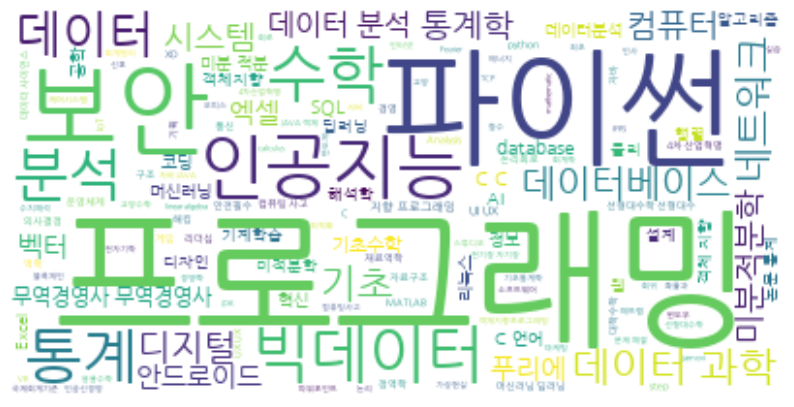

In [16]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()